In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [60]:
df = pd.read_csv("SalaryData.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## HW#1 Problem#1

Cost 함수를 정의

In [61]:
def compute_cost(n, m, points):
    total_cost = 0;
    N = float(len(points)); #코스트 값을 나눌때 자동형변환을 방지하기위해 float로 형변환
    
    for i in range(len(points)):
        x = points[i,0];
        y = points[i,1];
        total_cost += (y-(m*x+n))**2; #에러값의 제곱
    
    return total_cost/N; #에러값의 제곱값의 합을 개수로 나눈것을 코스트값이라 정의한다

Step Gradient 함수를 정의

In [62]:
def step_gradient(m_current, n_current, points, learing_rate):
    m_gradient = 0;
    n_gradient = 0;
    N = float(len(points));
    
    #현재 m,n 값에서의 기울기(경사도)를 구한다
    for i in range(len(points)):
        x = points[i,0];
        y = points[i,1];
        m_gradient += -(2/N)*x*(y-(m_current*x + n_current));
        n_gradient += -(2/N)*(y-(m_current*x + n_current));
        
        
    #위에서 구한 경사도에 따라 경사를 따라 내려간다
    m_updated = m_current - learing_rate * m_gradient;
    n_updated = n_current - learning_rate * n_gradient;
    
    return m_updated, n_updated; #업데이트 된 값을 반환한다
    

Gradient Descent 함수를 정의

In [63]:
def gradient_descent_runner(points, starting_m, starting_n, learning_rate, num_iterations):
    #초기값으로 부터 gradient descent를 실행한다
    m= starting_m;
    n = starting_n;
    
    cost_graph = [];
    
    #원하는 반복 수 만큼 경사를 따라 내려간다
    for i in range(num_iterations):
        cost_graph.append(compute_cost(n, m ,points)); #현재 m,n,points에 따른 코스트 값
        m, n = step_gradient(m, n, points, learning_rate); #경사를 내려가는 스텝
        
    return [m,n,cost_graph]
        

In [64]:
learning_rate = 0.01     # hyper parameter: alpha
num_iterations = 100    # hyper parameter: number of steps 
initial_m = 10      # initial guess for m 
initial_n = 4000      # initial guess for n 
points = np.array(df)
gd_iterations = 10; #GD를 반복하는 횟수 

#각 gd스텝을 저장할 m,n의 리스트
m_list = [];
n_list = [];

#0번째 값
m_list.append(initial_m);
n_list.append(initial_n);

for i in range(gd_iterations):
    m, n , cost_graph = gradient_descent_runner(points, initial_m, initial_n, learning_rate, num_iterations)
    m_list.append(m);
    n_list.append(n);
    initial_m = m;
    initial_n = n;
    


In [65]:
m_list

[10,
 11387.681722431003,
 10718.122513878412,
 10279.922672183473,
 9993.138323900717,
 9805.44938704067,
 9682.614451206155,
 9602.223876706179,
 9549.611446663128,
 9515.178706105513,
 9492.643848442833]

In [66]:
n_list

[4000,
 12734.42345759065,
 17246.40525217312,
 20199.317680023323,
 22131.881285892032,
 23396.667215709564,
 24224.419245917816,
 24766.149990513233,
 25120.69119238269,
 25352.724291993673,
 25504.580716666438]

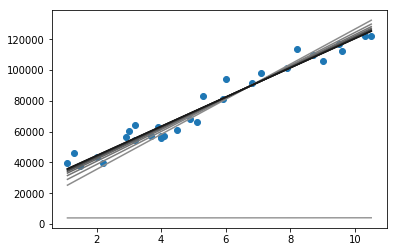

In [67]:

%matplotlib inline 
import matplotlib.pyplot as plt
x = np.array(points[:,0])
y = np.array(points[:,1])
plt.scatter(x,y)

color_list = [];
init_color = 0.6;
def_color = 0.05;

for i in range(gd_iterations+1):
    this_color = [init_color - def_color*i,init_color - def_color*i,init_color - def_color*i];
    color_list.append(this_color);
    


#첫번째 값까지 계산했을때 하나 더 추가해야함
for i in range(gd_iterations+1):
    pred = m_list[i]*x + n_list[i] 
    plt.plot(x,pred, color=color_list[i])
    
plt.show()

## HW#1 Problem#2

In [68]:
x = np.array(points[:,0])
y = np.array(points[:,1])

In [69]:
#행방향으로 되어있는 배열을 열방향으로 바꾼다
y = y.reshape(-1,1);
x = x.reshape(-1,1);

In [70]:
#x 배열에 값이 1인 열을 추가하기 위한 x0값을 설정한다
x0 = np.ones(len(x))
x0 = x0.reshape(-1,1);

In [71]:
#x 배열에 x0 열 배열을 추가한다
x = np.hstack((x0,x))

$\hat{\theta} = (X^TX)^{-1} X^TY $

우선 $ (X^TX)^{-1} $ 값을 구한다

In [72]:
xt = np.transpose(x)
xtx = np.dot(xt,x)
xtx_inv = np.linalg.inv(xtx)
xtx_inv

array([[ 0.15421086, -0.02274985],
       [-0.02274985,  0.00428165]])

 다음으로 $ X^TY $ 값을 구한다

In [73]:
xty = np.dot(xt,y)
xty

array([[ 2280090.],
       [14321961.]])

두 값의 행렬 곱으로 theta 값을 구한다

In [74]:
theta = np.dot(xtx_inv,xty)
theta

array([[25792.20019867],
       [ 9449.96232146]])

위에서 구한 n과 theta0 과의 차이와 오차율

In [75]:
defn = abs(n- theta[0][0])
defn_percent = defn/theta[0][0]*100
print(defn)
print(round(defn_percent,2),"%",sep="")

287.61948200231564
1.12%


위에서 구한 m과 theta1 과의 차이와 오차율

In [76]:
defm = abs(m-theta[1][0])
defm_percent = defm/theta[1][0]*100
print(defm)
print(round(defm_percent,2),"%",sep="")

42.68152698775884
0.45%


## HW#1 Problem#3

데이터

In [77]:
np.random.seed(0)
x_init = 2 - 3 * np.random.normal(0, 1, 20)
y_init = x_init - 2 * (x_init ** 2) + 0.5 * (x_init ** 3) + np.random.normal(-3, 3, 20)

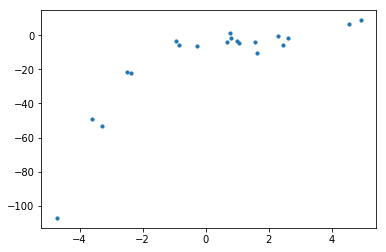

In [78]:
plt.scatter(x_init, y_init, s=10)

In [79]:
#행방향으로 되어있는 배열을 열방향으로 바꾼다
y = y_init.reshape(-1,1);
x = x_init.reshape(-1,1);

In [80]:
#x 배열에 값이 1인 열을 추가하기 위한 x0값을 설정한다
x0 = np.ones(len(x))
x0 = x0.reshape(-1,1);

함수가 최대 3차함수라는 가정이기 때문에 x는 3차까지 존재한다

In [81]:
x1 = x
x1

array([[-3.29215704],
       [ 0.79952837],
       [-0.93621395],
       [-4.7226796 ],
       [-3.60267397],
       [ 4.93183364],
       [-0.85026525],
       [ 2.45407162],
       [ 2.30965656],
       [ 0.76820449],
       [ 1.56786929],
       [-2.36282052],
       [-0.28311318],
       [ 1.63497495],
       [ 0.6684103 ],
       [ 0.99897702],
       [-2.48223722],
       [ 2.61547479],
       [ 1.0607969 ],
       [ 4.56228722]])

In [82]:
x2 = x**2
x2

array([[10.83829796],
       [ 0.63924562],
       [ 0.87649656],
       [22.30370258],
       [12.97925974],
       [24.32298305],
       [ 0.722951  ],
       [ 6.02246754],
       [ 5.3345134 ],
       [ 0.59013814],
       [ 2.4582141 ],
       [ 5.58292081],
       [ 0.08015307],
       [ 2.67314309],
       [ 0.44677233],
       [ 0.99795508],
       [ 6.16150161],
       [ 6.84070838],
       [ 1.12529005],
       [20.81446466]])

In [83]:
x3 = x**3
x3

array([[-3.56813789e+01],
       [ 5.11095014e-01],
       [-8.20588313e-01],
       [-1.05333241e+02],
       [-4.67600412e+01],
       [ 1.19956906e+02],
       [-6.14700114e-01],
       [ 1.47795667e+01],
       [ 1.23208939e+01],
       [ 4.53346775e-01],
       [ 3.85415839e+00],
       [-1.31914399e+01],
       [-2.26923902e-02],
       [ 4.37052199e+00],
       [ 2.98627229e-01],
       [ 9.96934192e-01],
       [-1.52943086e+01],
       [ 1.78917003e+01],
       [ 1.19370419e+00],
       [ 9.49615661e+01]])

열 배열들을 합쳐서 x 행렬을 만든다

In [84]:
x = np.hstack((x0,x1,x2,x3))
x

array([[ 1.00000000e+00, -3.29215704e+00,  1.08382980e+01,
        -3.56813789e+01],
       [ 1.00000000e+00,  7.99528375e-01,  6.39245622e-01,
         5.11095014e-01],
       [ 1.00000000e+00, -9.36213952e-01,  8.76496565e-01,
        -8.20588313e-01],
       [ 1.00000000e+00, -4.72267960e+00,  2.23037026e+01,
        -1.05333241e+02],
       [ 1.00000000e+00, -3.60267397e+00,  1.29792597e+01,
        -4.67600412e+01],
       [ 1.00000000e+00,  4.93183364e+00,  2.43229830e+01,
         1.19956906e+02],
       [ 1.00000000e+00, -8.50265253e-01,  7.22951000e-01,
        -6.14700114e-01],
       [ 1.00000000e+00,  2.45407162e+00,  6.02246754e+00,
         1.47795667e+01],
       [ 1.00000000e+00,  2.30965656e+00,  5.33451340e+00,
         1.23208939e+01],
       [ 1.00000000e+00,  7.68204494e-01,  5.90138145e-01,
         4.53346775e-01],
       [ 1.00000000e+00,  1.56786929e+00,  2.45821410e+00,
         3.85415839e+00],
       [ 1.00000000e+00, -2.36282052e+00,  5.58292081e+00,
      

$\hat{\theta} = (X^TX)^{-1} X^TY $

우선 $ (X^TX)^{-1} $ 값을 구한다

In [85]:
xt = np.transpose(x)
xtx = np.dot(xt,x)
xtx_inv = np.linalg.inv(xtx)
xtx_inv

array([[ 0.0972744 , -0.01806926, -0.00681668,  0.00108685],
       [-0.01806926,  0.0387146 ,  0.00186104, -0.00204214],
       [-0.00681668,  0.00186104,  0.00100473, -0.00012938],
       [ 0.00108685, -0.00204214, -0.00012938,  0.00013446]])

 다음으로 $ X^TY $ 값을 구한다

In [86]:
xty = np.dot(xt,y)
xty

array([[ -287.50209689],
       [  994.93937573],
       [-3617.36387279],
       [17623.7304465 ]])

두 값의 행렬 곱으로 theta 값을 구한다

In [87]:
theta = np.dot(xtx_inv,xty)
theta

array([[-2.13159804],
       [ 0.99141388],
       [-2.10330137],
       [ 0.49338043]])

구해진 theta값을 이용해 그래프를 그린다 <br/>
그래프의 x값은 -5에서 5까지 0.1간격으로 뽑은 값이다

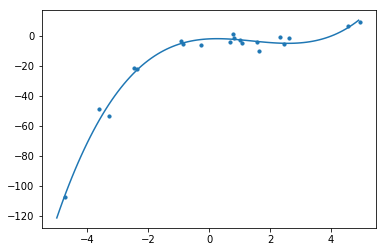

In [88]:
x_pred = np.arange(-5,5,0.1);
pred = theta[0][0] +  theta[1][0]*(x_pred) + theta[2][0]*(x_pred**2) + theta[3][0]*(x_pred**3);
plt.plot(x_pred,pred)
plt.scatter(x_init, y_init, s=10)
plt.show()